In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [14]:
class LinearRegression(nn.Module):#继承nn.Module
    def __init__(self, in_dim): #构造函数，需要调用nn.Mudule的构造函数
        super().__init__()       #等价于nn.Module.__init__()
        self.w = nn.Parameter(torch.randn(in_dim+1, 1))
        print("w.size()=", self.w.size())
        print("w\n", self.w)
        
    def forward(self, x): # x -> y
        x = torch.cat([x, torch.ones((x.shape[0],1))], dim = 1)
        y = x.matmul(self.w)
        return y

In [15]:
model = torch.nn.Linear(3, 1)
for parameters in model.parameters():
    print(parameters)

x = torch.rand(2, 3)
print("x\n", x)
y = model(x)
print("y\n", y)

print("=====================")
lr_model = LinearRegression(3)
y1 = lr_model(x)
print("y1\n", y1)

Parameter containing:
tensor([[0.1957, 0.4539, 0.3824]], requires_grad=True)
Parameter containing:
tensor([-0.5193], requires_grad=True)
x
 tensor([[0.9651, 0.7277, 0.8489],
        [0.6126, 0.3721, 0.5536]])
y
 tensor([[ 0.3244],
        [-0.0189]], grad_fn=<AddmmBackward0>)
w.size()= torch.Size([4, 1])
w
 Parameter containing:
tensor([[-0.3380],
        [-0.6454],
        [-0.0901],
        [-0.2586]], requires_grad=True)
y1
 tensor([[-1.1308],
        [-0.7556]], grad_fn=<MmBackward0>)


In [16]:
# The class to train and test the LinearRegression class
class Linear_Model():
    def __init__(self, in_dim):
        """
        创建模型和优化器，初始化线性模型和优化器超参数
        """
        self.learning_rate = 0.01
        self.epoches = 1000
        self.model = torch.nn.Linear(in_dim,1)
        #self.model = LinearRegression(in_dim)
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate)
        self.loss_function = torch.nn.MSELoss()

    def train(self, x, y, if_plot = False):
        """
        训练模型并保存参数
        输入:
            model_save_path: saved name of model
            x: 训练数据
            y: 回归真值
        返回:
            losses: 所有迭代中损失函数值
        """
        losses = []
        for epoch in range(self.epoches):
            prediction = self.model(x) # forward, __call__  input->output

            loss = self.loss_function(prediction, y)

            self.optimizer.zero_grad()
            loss.backward() #gradient
            self.optimizer.step() #update

            losses.append(loss.item())

            if epoch % 50 == 0:
                print("epoch: {}, loss is: {}".format(epoch, loss.item()))

        if x.shape[1]==1 and if_plot:
            plt.figure()
            plt.scatter(x.numpy(), y.numpy())
            plt.plot(x.numpy(), prediction.numpy(), color="r")
            plt.show()

        return losses
        
    def test(self, x, y, if_plot = False):
        """
        用保存或训练好的模型做测试
        输入:
            model_path: 训练好的模型的保存路径, e.g., "linear.pth"
            x: 测试数据
            y: 测试数据的回归真值
        返回:
            prediction: 测试数据的预测值
        """
        prediction = self.model(x)
        testMSE = self.loss_function(prediction, y)

        if if_plot and x.shape[1]==1 and if_plot:
            plt.figure()
            plt.scatter(x.numpy(), y.numpy())
            plt.plot(x.numpy(), prediction.numpy(), color="r")
            plt.show()

        return prediction, testMSE


In [17]:
# Creat the training and test datasets
def create_linear_data(data_size, in_dim, if_plot = False):
    """
    为线性模型生成数据
    输入:
        data_size: 样本数量
    返回:
        x_train: 训练数据
        y_train: 训练数据回归真值
        x_test: 测试数据
        y_test: 测试数据回归真值
    """
    np.random.seed(426)
    torch.manual_seed(426)
    #torch.cuda.manual_seed(426)

    x = torch.Tensor(data_size, in_dim).uniform_(1,10)

    w_true = torch.Tensor(in_dim, 1).uniform_(-5,5)
    #map_true = torch.tensor([[1.5],[-5.],[3.]], dtype=torch.float32)
    print('w真值:{}'.format(w_true))

    y = x.mm(w_true) + 10. + torch.FloatTensor(data_size, 1).normal_(0,10) #torch.randn(x.size())

    shuffled_index = np.random.permutation(data_size)
    #shuffled_index = torch.from_numpy(shuffled_index).long()
    x = x[shuffled_index]
    y = y[shuffled_index]
    split_index = int(data_size * 0.7)
    x_train = x[:split_index]
    y_train = y[:split_index]
    x_test = x[split_index:]
    y_test = y[split_index:]

    if if_plot and in_dim == 1:
        plt.figure()
        plt.scatter(x_train.numpy(),y_train.numpy())
        plt.show()
    return x_train, y_train, x_test, y_test
    

w真值:tensor([[-4.4202],
        [-3.3697]])
hello
torch.Size([70, 2]) torch.Size([30, 2])
Start training
epoch: 0, loss is: 1208.837646484375
epoch: 50, loss is: 94.31522369384766
epoch: 100, loss is: 91.23165893554688
epoch: 150, loss is: 88.72627258300781
epoch: 200, loss is: 86.69066619873047
epoch: 250, loss is: 85.0367431640625
epoch: 300, loss is: 83.69293212890625
epoch: 350, loss is: 82.60111236572266
epoch: 400, loss is: 81.71399688720703
epoch: 450, loss is: 80.99321746826172
epoch: 500, loss is: 80.40760040283203
epoch: 550, loss is: 79.93177795410156
epoch: 600, loss is: 79.54518127441406
epoch: 650, loss is: 79.2310791015625
epoch: 700, loss is: 78.97586822509766
epoch: 750, loss is: 78.76850891113281
epoch: 800, loss is: 78.60002899169922
epoch: 850, loss is: 78.46314239501953
epoch: 900, loss is: 78.35192108154297
epoch: 950, loss is: 78.26154327392578
Finish training


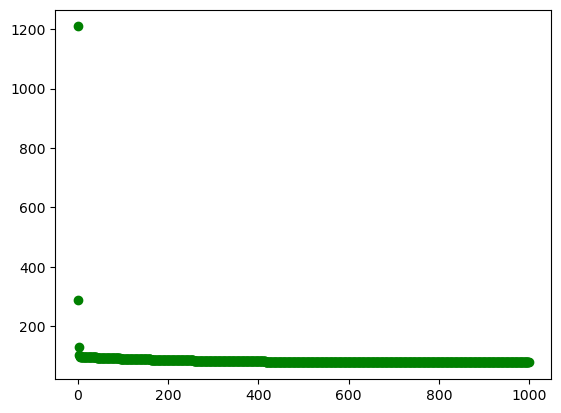

测试集上MSE损失值:63.394813537597656
weight Parameter containing:
tensor([[-4.7259, -3.2875]], requires_grad=True)
bias Parameter containing:
tensor([11.3857], requires_grad=True)


In [18]:
# 生成数据
data_size = 100
in_dim = 2
x_train, y_train, x_test, y_test = create_linear_data(data_size, in_dim, if_plot=False)

print("hello")
print(x_train.shape, x_test.shape)

# 线性回归模型实例化
linear = Linear_Model(in_dim)

# 模型训练
print("Start training")
losses = linear.train(x_train, y_train)
print("Finish training")


if_plot = True # set to True if you want to plot
if if_plot:
    plt.figure()
    plt.scatter(np.arange(len(losses)), losses, marker='o', c='green')
    plt.savefig('loss.jpg')
    plt.show()
# 模型测试
prediction, testMSE = linear.test(x_test, y_test)
print('测试集上MSE损失值:{}'.format(testMSE))


print('===============================')
for name, parameter in linear.model.named_parameters(): #named_parameters()  parameters()
    print(name, parameter)